# Implementasi K-NN pada dataset iris (TUGAS 3)

KNN: K Nearest Neighbor adalah salah satu algoritma dasar dalam pembelajaran mesin. Model pembelajaran mesin menggunakan sekumpulan nilai input untuk memprediksi nilai output. KNN adalah salah satu bentuk paling sederhana dari algoritma pembelajaran mesin yang banyak digunakan untuk klasifikasi. Ini mengklasifikasikan titik data tentang bagaimana tetangganya diklasifikasikan

Metode KNN
1. Menentukan nilai K
2. Menghitung jarak antara data uji dengan data latih
3. mengurutkan jarak dari yang terkecil-terbesar
4. mengambil data sebanyak K terdekat
5. memilih kelas mayor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
%matplotlib inline

In [ ]:
# mengakses data 
dataset_url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
# membaca data
df = pd.read_csv(dataset_url)
#menampilkan data
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
#mengecek jumlah baris dan jumlah kolom
df.shape

(150, 5)

In [ ]:
#membuat DataFrame kecuali kolom yang berisi target
X = df.drop(columns=['variety'])
#mengecek apakah kolom targer sudah berhasil dihilangkan
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#memisahkan kolom target dan dimasukkan ke dalam variable y
y = df['variety'].values
#menampilkan isi kolom target dari data 0-4
y[0:5]

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa'], dtype=object)

In [ ]:
#melakukan split dataset ke dalam bentuk data train dan data test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# membuat KNN klasifikasi, dengan menetapkan K/n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors = 3)
# melakukan pencocokan klasifikasi dengan data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#menampilkan 5 model prediksi pada data test
knn.predict(X_test)[0:5]

array(['Virginica', 'Setosa', 'Versicolor', 'Setosa', 'Setosa'],
      dtype=object)

In [ ]:
#mengecek akurasi dari data test
knn.score(X_test, y_test)

0.9666666666666667

Minimum error : -  0.03333333333333333 at K =  0


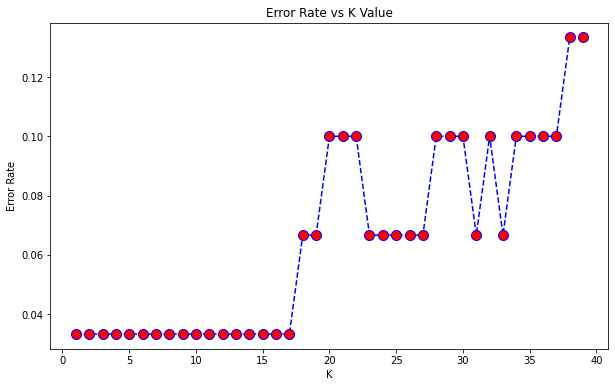

In [ ]:
#melakukan perbandingan Error rate dengan nilai K dan ditampilkan dalam bentuk grafik
error_rate=[]
for i in range (1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error : - ", min(error_rate), "at K = ", error_rate.index(min(error_rate)))

Maximum accuracy:- 0.9666666666666667 at K = 0


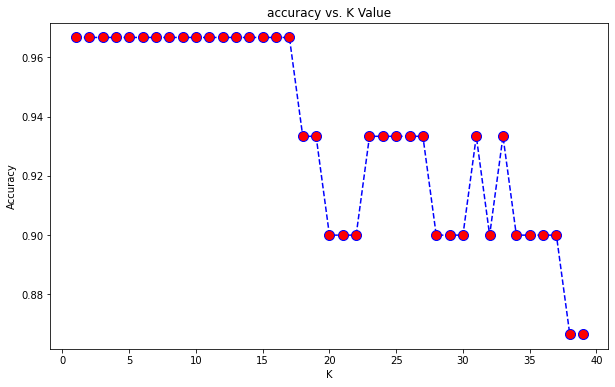

In [ ]:
#melakukan perbandingan dengan membandingkan akurasi dengan nilai K dan ditampilkan dalam bentuk grafik
acc = []
#will take some time
from sklearn import metrics
for i in range(1,40):
  neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
  yhat = neigh.predict(X_test)
  acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))